In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
def histogram_equalization(image, nbr_bins=256):
    #Dam bao anh dau vao la anh xam
    if image.mode != 'L':
        image= image.convert('L')

    #Chuyen doi hinh anh thanh mang Numpy
    image_array = np.array(image)

    #Tinh toan histogram cua anh
    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0, 256), density=True)

    #Tinh toan ham phan phoi tich luy (CDF - Cumulaive Distribution Function)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    #lay gia tri moi cho tung pixel dua tren CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    #Chuyen doi mang ket qua thanh hinh anh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

In [10]:
my_path = 'C:/Users/ducth/Documents/hoctap/thigiacmaytinh/img/clone_ava.jpg'
image = Image.open(my_path)

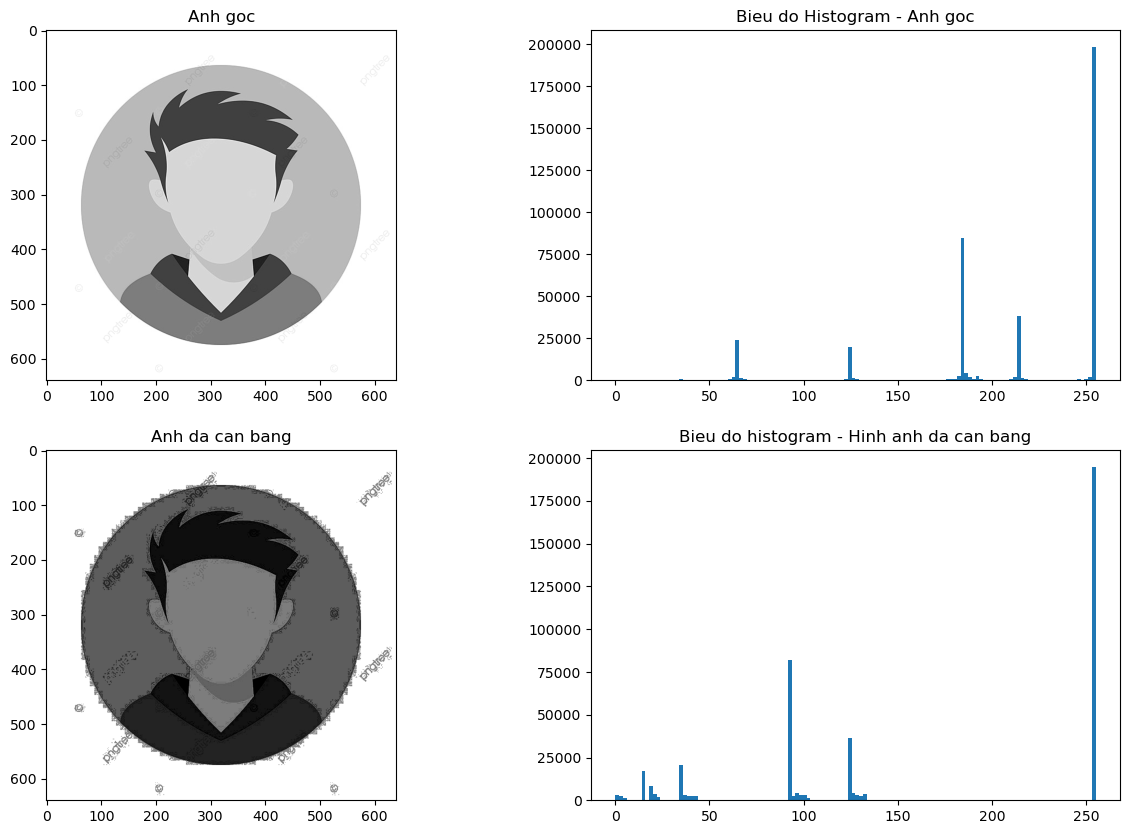

In [14]:
#Can bang luoc do anh xam
equalized_image = histogram_equalization(image)

#Tao luoi 2x2 de hien thi hinh anh va bieu do
plt.figure(figsize=(15, 10))

#Hien thi anh goc
plt.subplot(2,2,1)
plt.imshow(image.convert('L'), cmap='gray')
plt.title('Anh goc')

#Ve bieu do histogram cua anh goc
plt.subplot(2,2,2)
plt.hist(np.array(image.convert('L')).flatten(), bins=128)
plt.title('Bieu do Histogram - Anh goc')

#hien thi hinh anh da can bang
plt.subplot(2,2,3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Anh da can bang')

#Ve bieu do histogram cua anh da can bang
plt.subplot(2,2,4)
plt.hist(np.array(equalized_image).flatten(), bins=128)
plt.title('Bieu do histogram - Hinh anh da can bang')

plt.show()